In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def select_other(excluded_elements, all_elements):
    """
    excluded_elements, all_elements: two sets
    Return one element of (all_elements - excluded_elements) at random
    """
    remaining_elements = all_elements - excluded_elements
    selected_element = np.random.choice(list(remaining_elements), 1)[0]
    return selected_element  

# Monty Hall

## Problem

The original problem description, as it appears on [Marilyn vos Savant's website](http://marilynvossavant.com/game-show-problem/):

> Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say \#1, and the host, who knows what’s behind the doors, opens another door, say \#3, which has a goat. He says to you, "Do you want to pick door \#2?" Is it to your advantage to switch your choice of doors?

The answer is 'yes'. For more information on the problem, you can see its entry on [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem).

## Simulation

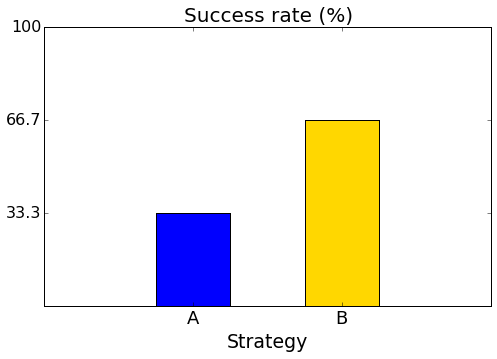

In [4]:
N = 100000 # we repeat the simulation N times

# there are three doors, numbered #1, #2, #3
doors = {1, 2, 3}
# exactly one of them contains the car
door_with_car = np.random.choice(list(doors), N)

# player makes a first guess about the door that contains the car
first_guess = np.random.choice(list(doors), N)

# host opens a door that does not contain the car
# and is different than player's guess
revealed_door = [select_other({first_guess[pos], door_with_car[pos]}, doors) for pos in range(N)]

# player follows one of two strategies:
# either sticks to first guess
second_guess_A = first_guess
# or switches to the remaining door
# (other than first guess and revealed door)
second_guess_B = [select_other({first_guess[pos], revealed_door[pos]}, doors) for pos in range(N)]

# calculate the success rate for each strategy
success_rate_A = sum(second_guess_A == door_with_car) / N
success_rate_B = sum(second_guess_B == door_with_car) / N

fig, ax = plt.subplots(figsize = (8, 5))
ax.set(xlim = (-1, 2), xticks = [0, 1], yticks = [100*success_rate_A, 100*success_rate_B, 100], ylim = (0, 100))
ax.set_title("Success rate (%)", size = 20)
ax.set_xticklabels(["A", "B"], size = 18)
ax.set_xlabel("Strategy", size = 19)
ax.set_yticklabels(["{:.1f}".format(100*success_rate_A), "{:.1f}".format(100*success_rate_B), "100"], size = 16)
_tmp = ax.bar([0], [100*success_rate_A], width = 0.5, align = "center", color = "blue")
_tmp = ax.bar([1], [100*success_rate_B], width = 0.5, align = "center", color = "gold")

# Bertrand's Boxes
From [Wikipedia](https://en.wikipedia.org/wiki/Bertrand%27s_box_paradox):
> There are three boxes, each with one drawer on each of two sides. Each drawer contains a coin. One box has a gold coin on each side (GG), one a silver coin on each side (SS), and the other a gold coin on one side and a silver coin on the other (GS). A box is chosen at random, a random drawer is opened, and a gold coin is found inside it. What is the chance of the coin on the other side being gold?

One might rush to answer '1/2' - but the answer is '2/3'.

In [21]:
N = 200000 # we repeat the simulation N times

# there are two kinds of coins involved
GOLD = 1; SILVER = 0

# there are three boxes, each with two drawers
# each drawer contains one coin
box_GG = [GOLD, GOLD]
box_GS = [GOLD, SILVER]
box_SS = [SILVER, SILVER]

boxes = [box_GG, box_GS, box_SS]

def select_drawer(boxes):
    """ randomly select one drawer from one box """
    # select one box at random
    random_choice = np.random.choice(len(boxes))
    chosen_box = boxes[random_choice]
    
    # open one of its two drawers
    opened_drawer, other_drawer = np.random.permutation(chosen_box)
    
    return opened_drawer, other_drawer

# simulate selection of drawer N times
selection = [select_drawer(boxes) for i in range(N)]

opened_drawer = [box[0] for box in selection]
other_drawer  = [box[1] for box in selection]

# mark the cases where we found a gold coin in opened drawer...
found_gold = [coin == GOLD for coin in opened_drawer]
# and among those cases,
# mark the ones where there was a gold coin in the other drawer of the same box
found_gold_also_in_other_drawer = [other_drawer[i] == GOLD for i, f in enumerate(found_gold) if f == True]

# the number of cases we found a gold coin...
num_found_gold = sum(found_gold)
# and among those cases,
# the number of cases there was a gold coin in the other drawer too
num_found_gold_in_other_drawer = sum(found_gold_also_in_other_drawer)

ratio = num_found_gold_in_other_drawer / num_found_gold 

print("Given that we found a Gold coin in the opened drawer,\n"
      "the chances to have a Gold coin in the other drawer, too,\n"
      "are ~{0:.1f}%.".format(100*ratio))


Given that we found a Gold coin in the opened drawer,
the chances to have a Gold coin in the other drawer, too,
are ~66.6%.


# Three Prisoners Problem
[Wikipedia](https://en.wikipedia.org/wiki/Three_Prisoners_problem)

# Bertrand's Paradox
[Wikipedia][1]

[1]: https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)